In [2]:
import pandas as pd
import numpy as np
import math
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv("data/train.csv") 

df.index = np.arange(0,len(df))
print('Full dataset shape: {}'.format(df.shape))
print('-Dataset examples-')
print(df.iloc[::5000000, :])

Full dataset shape: (2543146, 4)
-Dataset examples-
   user_id  item_id  rating      timestamp
0        0     7314     5.0  1353612262000


In [10]:
df.shape

(2543146, 4)

In [4]:
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']][:], reader)
#data.split(n_folds=3)

svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'])

{'test_rmse': array([1.25046634, 1.2493667 , 1.25335552, 1.2515058 , 1.25103042]),
 'test_mae': array([0.96557938, 0.96453194, 0.96655236, 0.9652131 , 0.96581928]),
 'fit_time': (79.04903626441956,
  79.62240695953369,
  79.43208575248718,
  79.6452157497406,
  79.35078239440918),
 'test_time': (3.983841896057129,
  3.8384382724761963,
  3.9050850868225098,
  3.306541919708252,
  3.3134548664093018)}

In [5]:
df_785314 = df[(df['user_id'] == 785314) ]
df_785314 = df_785314.set_index('item_id')
# df_785314 = df_785314.join(df_title)['Name']
print(df_785314)


         user_id  rating      timestamp
item_id                                
13612     785314     5.0  1394659964000
16782     785314     2.0  1400448824000
12895     785314     5.0  1401392429000
19563     785314     3.0  1401586041000
16258     785314     4.0  1404369327000


In [6]:
import pandas as pd

# Load files
df_title = pd.read_csv("data/item_metadata_filtered.csv")
df_mapping = pd.read_json("data/id_mappings.json")

# Extract item mapping
item_mapping = df_mapping["item_mapping"]

# Convert to DataFrame for clarity (optional but useful)
item_mapping_df = pd.DataFrame(list(item_mapping.items()), columns=["item_str_code", "item_id"])

# Create a dictionary to map ASIN to item_id
mapping_dict = dict(item_mapping.items())

# Map parent_asin in df_title to item_id using the dictionary
df_title["item_id"] = df_title["parent_asin"].map(mapping_dict)

# Preview the result


In [24]:
df_title

,parent_asin,main_category,title,average_rating,rating_number,price,store,features,description,images,categories,image_count,has_images,image_urls,category,item_id
0,B07WFSQXL5,All Beauty,PPY Eyelash Growth Serum – Natural Ingredients...,3.9,114.0,NaN,PPY,[],[],{'hi_res': array(['https://m.media-amazon.com/...,[],27,True,['https://m.media-amazon.com/images/I/615N6fkc...,All_Beauty,66457.0
1,B08BV6F6BC,All Beauty,Wixar Natural Sea Moss Soap - (2 PACK) - Laven...,4.4,41.0,NaN,WIXAR NATURALS,[],[],{'hi_res': array(['https://m.media-amazon.com/...,[],21,True,['https://m.media-amazon.com/images/I/81ugegqe...,All_Beauty,71310.0
2,B07Z818MLY,All Beauty,7 Packs Deep Wave Crochet Hair 22 Inch Deep wa...,3.4,10.0,NaN,Yun Mei Hair,[],[],{'hi_res': array(['https://m.media-amazon.com/...,[],21,True,['https://m.media-amazon.com/images/I/71aVcpK8...,All_Beauty,67591.0
3,B071DY8Z4B,All Beauty,BEWAVE Hair Brush Sponge Twist With Comb Hair ...,4.2,24.0,NaN,BEWAVE,[],[],{'hi_res': array(['https://m.media-amazon.com/...,[],17,True,['https://m.media-amazon.com/images/I/61or2jYp...,All_Beauty,52585.0
4,B0BTLTVR1X,All Beauty,"Zydeco Chop Chop Cajun Seasoning Base, 8 Ounce...",4.7,21.0,NaN,BORELTH,"['All Natural blend of Dehydrated Onion, Dehyd...",['Zydeco Chop Chop is a blend of Dehydrated On...,{'hi_res': array(['https://m.media-amazon.com/...,[],3,True,['https://m.media-amazon.com/images/I/71707mY6...,All_Beauty,77706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77828,B000NE85S2,NaN,Quicken Family Lawyer (CD-ROM),3.5,14.0,NaN,Parsons Technology,"[""America's Best-Selling Legal Software!""\n 'P...",['86 Forms in 10 categories: Estate Planning (...,"{'hi_res': array([None], dtype=object), 'large...",['Software' 'Business & Office' 'Legal'],2,True,['https://m.media-amazon.com/images/I/41+rSEEa...,Software,1512.0
77829,B076NZT5VY,Software,Ubuntu 16.04 Linux Desktop - 32-Bit 64-Bit Sup...,3.7,4.0,NaN,BrownTech PC System Tools,['Ubuntu 16.04 Linux on 2 Disc DVD Set 32 Bit ...,"['Ubuntu 16.04 ""Xenial Xerus"" 64-BIT & 32BIT L...",{'hi_res': array(['https://m.media-amazon.com/...,['Software' 'Linux' 'Operating Systems & Utili...,18,True,['https://m.media-amazon.com/images/I/71QlusvD...,Software,55954.0
77830,B001FSG0TQ,NaN,The Print Shop: Labels and Logos 2009,2.3,4.0,NaN,Encore,['Drag-and-drop design tools' 'Photo-realistic...,['Everything you need to create impressive lab...,"{'hi_res': array([None], dtype=object), 'large...",['Software' 'Business & Office' 'Office Suites'],2,True,['https://m.media-amazon.com/images/I/51xSHvST...,Software,2293.0
77831,B0009STM5C,Software,Jumpstart Advanced Kindergarten (PC & Mac) [OL...,3.7,4.0,NaN,Knowledge Adventure,['This 3-CD set uses a fun animal theme to int...,['From the Manufacturer'\n 'The JumpStart Adva...,"{'hi_res': array([None], dtype=object), 'large...","['Software' 'Blizzard, Knowledge Adventure & S...",2,True,['https://m.media-amazon.com/images/I/41YPPRP8...,Software,891.0


Index(['parent_asin', 'main_category', 'title', 'average_rating',
       'rating_number', 'price', 'store', 'features', 'description', 'images',
       'categories', 'image_count', 'has_images', 'image_urls', 'category',
       'item_id'],
      dtype='object')

In [34]:
df_title["title"]

0        PPY Eyelash Growth Serum – Natural Ingredients...
1        Wixar Natural Sea Moss Soap - (2 PACK) - Laven...
2        7 Packs Deep Wave Crochet Hair 22 Inch Deep wa...
3        BEWAVE Hair Brush Sponge Twist With Comb Hair ...
4        Zydeco Chop Chop Cajun Seasoning Base, 8 Ounce...
                               ...                        
77828                       Quicken Family Lawyer (CD-ROM)
77829    Ubuntu 16.04 Linux Desktop - 32-Bit 64-Bit Sup...
77830                The Print Shop: Labels and Logos 2009
77831    Jumpstart Advanced Kindergarten (PC & Mac) [OL...
77832    Better Homes and Gardens Landscaping and Deck ...
Name: title, Length: 77833, dtype: object

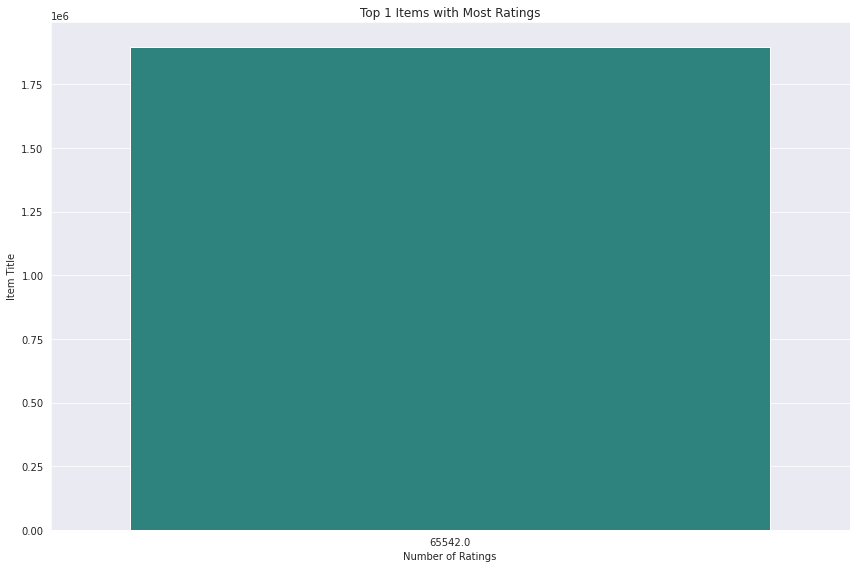

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 1
top_items = df_title.sort_values('rating_number', ascending=False).head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_items, x='item_id', y='rating_number', palette='viridis')
plt.title(f'Top {top_n} Items with Most Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Item Title')
plt.tight_layout()
plt.show()

In [8]:
# df_title["rating_number"].mean()

num = df_title['rating_number'].mean()
drop_movie_list = df_title[df_title['rating_number'] < num]["item_id"]

In [9]:
user_785314 = df_title.copy()
user_785314 = user_785314.reset_index()
user_785314 = user_785314[~user_785314['item_id'].isin(drop_movie_list)]

# getting full dataset
data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)

trainset = data.build_full_trainset()
svd.fit(trainset)

user_785314['estimated'] = user_785314['item_id'].apply(lambda x: svd.predict(785314, x).est)

user_785314 = user_785314.drop('item_id', axis = 1)

user_785314 = user_785314.sort_values('estimated', ascending=False)
print(user_785314.head(10))

       index parent_asin         main_category  \
10134  10134  B001V9V71U            All Beauty   
35516  35516  B01IPPG6BI  Appstore for Android   
44971  44971  B00G6ZTM3Y  Appstore for Android   
45294  45294  B00SYSGKJK  Appstore for Android   
65837  65837  B007EC27QM  Appstore for Android   
73173  73173  B00FGDDTSQ              Software   
69798  69798  B00820STKI  Appstore for Android   
54139  54139  B06XW7YP3S  Appstore for Android   
62642  62642  B01MA2WU55  Appstore for Android   
13384  13384  B06Y5XQ6SJ            All Beauty   

                                                   title  average_rating  \
10134                MURO 128 5 Percent SOLUTION 15MED L             4.7   
35516                         Quilting Tutorials by MSQC             4.7   
44971                                           Terraria             4.2   
45294                          Jurassic World™: The Game             3.8   
65837                                    Calculator Plus             